# Zindi Competition :
* Sandra Mourali
* Salma Ghabri
* Aziz Bellaaj

## Imports : 

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import csv
import os

import warnings
from tqdm import tqdm_notebook as tqdm
import itertools
import tensorflow as tf
warnings.filterwarnings("ignore")
SEED = 42  

## Model Architecture :

In [2]:
model = Sequential()
model.add(Conv2D(20,(5,5), padding="same",input_shape=(24,24,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

model.add(Dense(2))
model.add(Activation("sigmoid"))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 20)        1520      
                                                                 
 activation (Activation)     (None, 24, 24, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 20)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2880)              0         
                                                                 
 dense (Dense)               (None, 500)               1440500   
                                                                 
 activation_1 (Activation)   (None, 500)               0         
                                                        

In [4]:
class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth) 

        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)

        model.add(Conv2D(20, (5, 5), padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        model.add(Conv2D(100, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        model.add(Dense(classes))
        model.add(Activation("sigmoid"))

        return model


## Train-Test Split and Data-Augmentation

In [5]:
DATASET = "train"  
MODEL = "zindi.model" 
PLOT = "plot.png" 

EPOCHS = 50
INIT_LR = 1e-3
BS = 32

data = []
labels = []

In [6]:
with open('train.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader) 
    image_label_map = {row[0]: int(float(row[1])) for row in csv_reader}

imagePaths = sorted(list(paths.list_images(DATASET)))
random.seed(42)
random.shuffle(imagePaths)

with tqdm(total=len(imagePaths)) as pbar:
    for idx, imagePath in enumerate(imagePaths):
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (28, 28))
        image = img_to_array(image)
        data.append(image)

        image_file = imagePath.split(os.path.sep)[-1]
        label = image_label_map.get(image_file, -1)  

        labels.append(label)
        pbar.update(1)


  0%|          | 0/2603 [00:00<?, ?it/s]

In [7]:
# data[0]
# data[0].shape
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
# labels

In [8]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)
# trainX.shape
# trainY.shape
trainY = to_categorical(trainY, num_classes=10)
testY = to_categorical(testY, num_classes=10)
trainY[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
aug = ImageDataGenerator(rotation_range=30,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         shear_range=0.2,
                         zoom_range=0.2,
                         horizontal_flip=True,
                         fill_mode="nearest")

## Model Training :

In [13]:
model = LeNet.build(width=28, height=28, depth=3, classes=10)
opt = Adam(lr=INIT_LR)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
EPOCHS = 50
INIT_LR = 1e-3
BS = 32
# print(model.summary())

In [11]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [14]:
H = model.fit(x=aug.flow(trainX, trainY, batch_size=BS),
              validation_data=(testX, testY),
              steps_per_epoch=len(trainX) // BS,
              epochs=200,
              verbose=1)

Epoch 1/200
61/61 [==============================] - 4s 56ms/step - loss: 0.1712 - accuracy: 0.4995 - val_loss: 0.1388 - val_accuracy: 0.5269
Epoch 2/200
61/61 [==============================] - 4s 62ms/step - loss: 0.1392 - accuracy: 0.5231 - val_loss: 0.1404 - val_accuracy: 0.5269
Epoch 3/200
61/61 [==============================] - 4s 62ms/step - loss: 0.1401 - accuracy: 0.4985 - val_loss: 0.1389 - val_accuracy: 0.4608
Epoch 4/200
61/61 [==============================] - 5s 76ms/step - loss: 0.1412 - accuracy: 0.5036 - val_loss: 0.1388 - val_accuracy: 0.4916
Epoch 5/200
61/61 [==============================] - 5s 76ms/step - loss: 0.1398 - accuracy: 0.5118 - val_loss: 0.1417 - val_accuracy: 0.4731
Epoch 6/200
61/61 [==============================] - 5s 81ms/step - loss: 0.1401 - accuracy: 0.5051 - val_loss: 0.1389 - val_accuracy: 0.5269
Epoch 7/200
61/61 [==============================] - 5s 80ms/step - loss: 0.1402 - accuracy: 0.5092 - val_loss: 0.1385 - val_accuracy: 0.5269
Epoch 

In [15]:
model.save(MODEL)

INFO:tensorflow:Assets written to: zindi.model\assets


INFO:tensorflow:Assets written to: zindi.model\assets


## Model Evaluation :

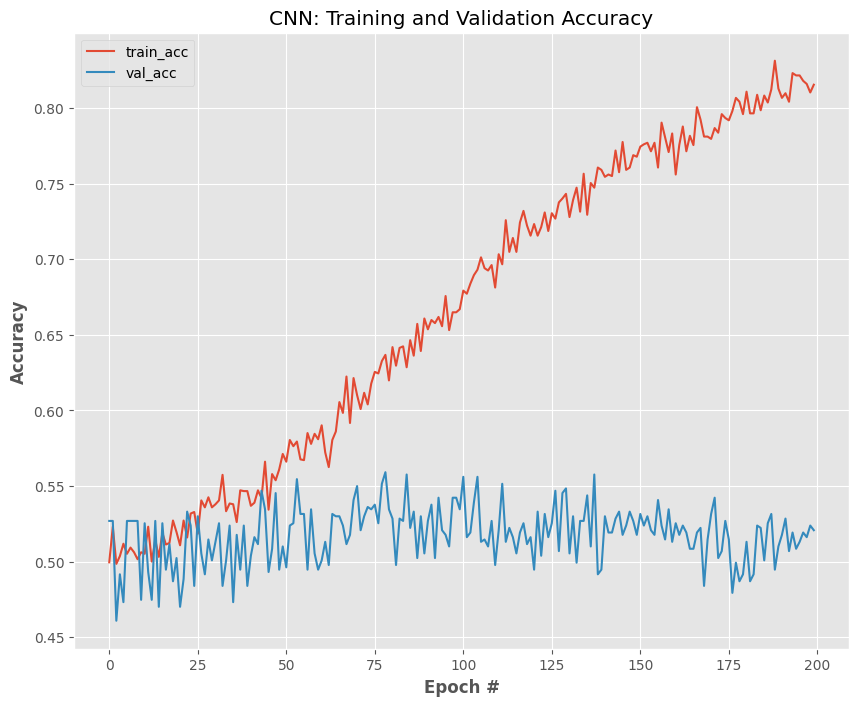

In [16]:
N = np.arange(0, 200)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("CNN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

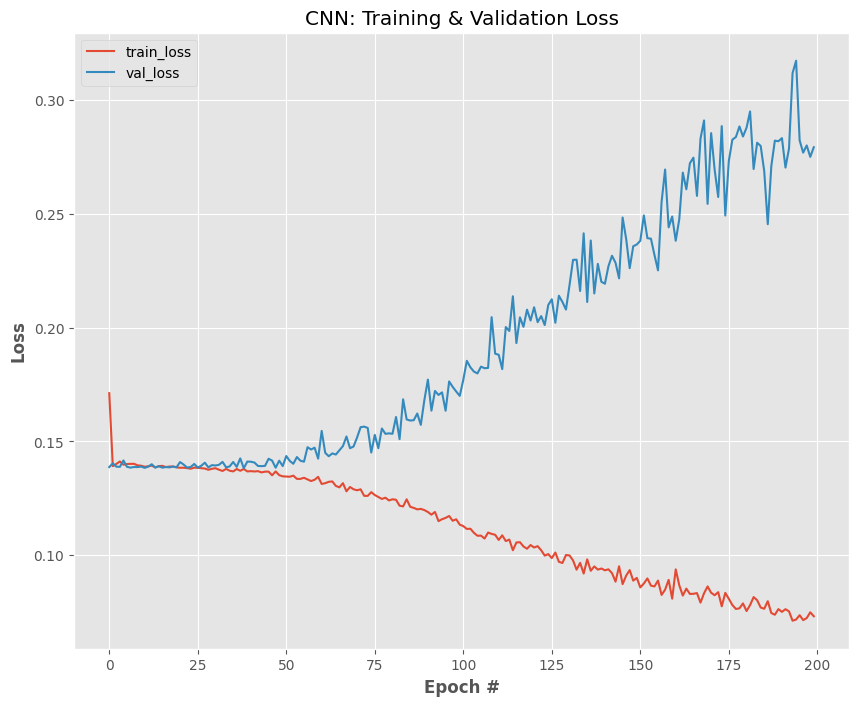

In [17]:
N = np.arange(0, 200)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("CNN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

## Model Testing :

#### Submission.csv :

In [30]:
from tqdm import tqdm
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import os
import pandas as pd

# Define the class labels
class_labels = ['ID', 'Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']
# ID, Hardhat, Mask, NO-Hardhat, NO-Mask, NO-Safety Vest, Person, Safety Cone, Safety Vest, machinery, vehicle

path_to_test = 'test'
MODEL = "zindi.model"
model = load_model(MODEL)

# Read the test.csv file to get the image IDs
test_csv_path = 'test.csv'
test_data = pd.read_csv(test_csv_path)
testImagePaths = test_data['filename']

def predict_image(image):
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = np.expand_dims(image, axis=0)

    preds = model.predict(image)[0]
    return preds

submission_file = 'submission.csv'
predictions = {}

# Loop through test images and make predictions
for image_name in tqdm(testImagePaths):
    image_path = os.path.join(path_to_test, image_name)
    image = cv2.imread(image_path)
    preds = predict_image(image)
    predictions[image_name] = preds

# Write predictions to a CSV file
with open(submission_file, 'w') as file:
    file.write(','.join(class_labels) + '\n')
    for index, image_name in enumerate(testImagePaths):
        # Extract the ID from the filename in the test.csv
        image_id = test_data['ID'][index]
        # Convert softmax probabilities to 1 or 0 based on threshold
        predicted_classes = [1 if p >= 0.75 else 0 for p in predictions[image_name]]
        # Construct the row data
        row_data = [image_id] + list(map(str, predicted_classes))
        # Write the row data to the CSV file
        file.write(','.join(row_data) + '\n')


  0%|          | 0/196 [00:00<?, ?it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 3/196 [00:00<00:07, 24.87it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 6/196 [00:00<00:07, 24.27it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 9/196 [00:00<00:07, 24.19it/s]

1/1 [==============================] - 0s 16ms/step


  6%|▌         | 12/196 [00:00<00:08, 22.06it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 15/196 [00:00<00:09, 18.59it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▊         | 17/196 [00:00<00:09, 18.57it/s]

1/1 [==============================] - 0s 16ms/step


 10%|█         | 20/196 [00:00<00:08, 20.26it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 23/196 [00:01<00:08, 21.15it/s]

1/1 [==============================] - 0s 16ms/step


 13%|█▎        | 26/196 [00:01<00:07, 22.28it/s]

1/1 [==============================] - 0s 16ms/step


 15%|█▍        | 29/196 [00:01<00:07, 22.84it/s]

1/1 [==============================] - 0s 16ms/step


 16%|█▋        | 32/196 [00:01<00:07, 23.24it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 35/196 [00:01<00:07, 22.83it/s]

1/1 [==============================] - 0s 16ms/step


 19%|█▉        | 38/196 [00:01<00:06, 23.44it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 41/196 [00:01<00:06, 22.21it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 44/196 [00:02<00:07, 20.93it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 47/196 [00:02<00:06, 22.01it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▌       | 50/196 [00:02<00:06, 23.04it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 53/196 [00:02<00:05, 23.84it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▊       | 56/196 [00:02<00:06, 23.15it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 59/196 [00:02<00:05, 23.44it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 62/196 [00:02<00:05, 23.67it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 65/196 [00:02<00:05, 23.00it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 68/196 [00:03<00:06, 20.46it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 71/196 [00:03<00:05, 21.20it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 74/196 [00:03<00:05, 22.35it/s]

1/1 [==============================] - 0s 16ms/step


 39%|███▉      | 77/196 [00:03<00:05, 22.42it/s]

1/1 [==============================] - 0s 16ms/step


 41%|████      | 80/196 [00:03<00:04, 23.35it/s]

1/1 [==============================] - 0s 16ms/step


 42%|████▏     | 83/196 [00:03<00:04, 23.86it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 86/196 [00:03<00:04, 24.08it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 89/196 [00:03<00:04, 22.59it/s]

1/1 [==============================] - 0s 16ms/step


 47%|████▋     | 92/196 [00:04<00:04, 23.28it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 95/196 [00:04<00:04, 23.59it/s]

1/1 [==============================] - 0s 15ms/step


 50%|█████     | 98/196 [00:04<00:04, 22.88it/s]

1/1 [==============================] - 0s 15ms/step


 52%|█████▏    | 101/196 [00:04<00:04, 23.64it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 104/196 [00:04<00:03, 23.95it/s]

1/1 [==============================] - 0s 15ms/step


 55%|█████▍    | 107/196 [00:04<00:03, 24.31it/s]

1/1 [==============================] - 0s 17ms/step


 56%|█████▌    | 110/196 [00:04<00:03, 23.43it/s]

1/1 [==============================] - 0s 16ms/step


 58%|█████▊    | 113/196 [00:04<00:03, 23.82it/s]

1/1 [==============================] - 0s 16ms/step


 59%|█████▉    | 116/196 [00:05<00:03, 23.90it/s]

1/1 [==============================] - 0s 16ms/step


 61%|██████    | 119/196 [00:05<00:03, 22.80it/s]

1/1 [==============================] - 0s 16ms/step


 62%|██████▏   | 122/196 [00:05<00:03, 23.81it/s]

1/1 [==============================] - 0s 16ms/step


 64%|██████▍   | 125/196 [00:05<00:02, 24.21it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 128/196 [00:05<00:02, 22.96it/s]

1/1 [==============================] - 0s 16ms/step


 67%|██████▋   | 131/196 [00:05<00:02, 23.62it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 134/196 [00:05<00:02, 23.56it/s]

1/1 [==============================] - 0s 19ms/step


 70%|██████▉   | 137/196 [00:06<00:02, 23.04it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████▏  | 140/196 [00:06<00:02, 20.67it/s]

1/1 [==============================] - 0s 16ms/step


 73%|███████▎  | 143/196 [00:06<00:02, 21.28it/s]

1/1 [==============================] - 0s 16ms/step


 74%|███████▍  | 146/196 [00:06<00:02, 21.64it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 149/196 [00:06<00:02, 20.99it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 152/196 [00:06<00:02, 21.37it/s]

1/1 [==============================] - 0s 17ms/step


 79%|███████▉  | 155/196 [00:06<00:01, 21.47it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 158/196 [00:07<00:01, 21.02it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 161/196 [00:07<00:01, 21.62it/s]

1/1 [==============================] - 0s 15ms/step


 84%|████████▎ | 164/196 [00:07<00:01, 22.11it/s]

1/1 [==============================] - 0s 17ms/step


 85%|████████▌ | 167/196 [00:07<00:01, 22.33it/s]

1/1 [==============================] - 0s 15ms/step


 87%|████████▋ | 170/196 [00:07<00:01, 22.02it/s]

1/1 [==============================] - 0s 18ms/step


 88%|████████▊ | 173/196 [00:07<00:01, 22.20it/s]

1/1 [==============================] - 0s 15ms/step


 90%|████████▉ | 176/196 [00:07<00:00, 23.03it/s]

1/1 [==============================] - 0s 15ms/step


 91%|█████████▏| 179/196 [00:07<00:00, 23.36it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 182/196 [00:08<00:00, 23.01it/s]

1/1 [==============================] - 0s 16ms/step


 94%|█████████▍| 185/196 [00:08<00:00, 22.99it/s]

1/1 [==============================] - 0s 16ms/step


 96%|█████████▌| 188/196 [00:08<00:00, 23.55it/s]

1/1 [==============================] - 0s 15ms/step


 97%|█████████▋| 191/196 [00:08<00:00, 22.87it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▉| 194/196 [00:08<00:00, 22.81it/s]

1/1 [==============================] - 0s 18ms/step


100%|██████████| 196/196 [00:08<00:00, 22.58it/s]
